## Experiments: Comparing RSAST with other methods

In [15]:
import sys 
import os 
#add sast library path
file_path = os.path.dirname(os.getcwd())+"/sast"

#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.path.dirname(os.getcwd())+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

#add cd_diagram library path
file_path = os.path.dirname(os.getcwd())+"\cd_diagram"

#file_path = r"C:\Users\Public\random_sast\cd_diagram"
sys.path.append(file_path)


file_path = os.path.dirname(os.getcwd())+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

sys.path


['/home/nirojasvar/random_sast/ExperimentationRSAST',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python310.zip',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/lib-dynload',
 '',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages',
 '/home/nirojasvar/random_sast/sast',
 '/home/nirojasvar/random_sast\\sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\sast',
 '/home/nirojasvar/random_sast\\cd_diagram',
 '/home/nirojasvar/random_sast/cd_diagram',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\cd_diagram',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/cd_diagram',
 '/home/nirojasvar/random_sast/sast',
 '/home/nirojasvar/random_sast\\sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\sast',
 '/home/nirojasvar/random_sast\\cd_diagram',
 '/home/nir

In [16]:
from sast import *
from sktime.datasets import load_UCR_UEA_dataset, tsc_dataset_names
from sktime.classification.kernel_based import RocketClassifier
import time
import pandas as pd
from sktime.transformations.panel.shapelet_transform import ShapeletTransform
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math
hyperparameter='ACF&PACF: n_random_points=30 nb_inst_per_class=30'

### Reading Datasets

In [17]:
# Set directory where the csv files are located
directory = os.getcwd()+'/ResultsByClassifier'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)

        # Append the dataframe to the list
        df['filename']=filename
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_other_methods = pd.concat(dfs, ignore_index=True)
df_other_methods=df_other_methods[['filename','folds:','0']]
df_other_methods['method']=df_other_methods['filename'].str.split('_').str[0]
df_other_methods
df_other_methods=df_other_methods.rename(columns={'folds:':'dataset','0':'score'})
df_other_methods=df_other_methods[['dataset','score','method']]



In [18]:
# Set directory where the csv files are located
df_other_methods=df_other_methods[df_other_methods.method!="STC"]
filepath = os.getcwd()+'/ResultsByClassifier/SAST_TESTFOLDS2.csv'
df = pd.read_csv(filepath)
df = df.rename(columns={'folds:':'dataset','STC':'score'})
df['method']="STC"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])

In [19]:
df_other_methods['method'].unique()

array(['ROCKET', 'HIVE-COTEv1', 'BOSS', 'RISE', 'SAST', 'TSF',
       'InceptionTime', 'TS-CHIEF', 'S-BOSS', 'ResNet', 'ProximityForest',
       'WEASEL', 'Catch22', 'cBOSS', 'STC'], dtype=object)

In [20]:
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['SAST','ROCKET','STC','HIVE-COTEv1'])]
df_other_methods=df_other_methods[df_other_methods['method'].isin(['SAST','STC', 'ROCKET', 'HIVE-COTEv1'])]

In [21]:
# Set directory where the csv files are located
#directory = os.getcwd()+'/ResultsRsast'
#directory = os.getcwd()+'/results_accuracy_per_ds'

directories=[]
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST')
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST_All')
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST_Extra')
#directories.append(os.getcwd()+'/ResultsRsast/Server16_Hyperparameter_Tunning')
#directories.append(os.getcwd()+'/ResultsRsast/Server17_Hyperparameter_Tunning')
#directories.append(os.getcwd()+'/results_accuracy_per_ds')
#directories.append(os.getcwd()+'/results_accuracy_per_ds_10000')

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for directory in directories:
    for filename in os.listdir(directory):
        # Check if the file starts with "df_overall_tunning" and ends with ".csv"
        if filename.startswith("df_all_overall_tunning") and filename.endswith(".csv"):
            # Read the csv file into a dataframe
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            df['rpoint']=df['rpoint'].astype(str)
            df['nb_per_class']=df['nb_per_class'].astype(str)
            df['rpoint']=df['rpoint'].replace("(lenthg ts)//2","half_len")
            df['nb_per_class']=df['nb_per_class'].replace("(max instances per class)//2","half_instance")
            df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
            df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
            # Append the dataframe to the list
            dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_result = pd.concat(dfs, ignore_index=True)
# df_result.head(3)

/tmp/ipykernel_117732/326842805.py:29: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_117732/326842805.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_117732/326842805.py:29: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_117732/326842805.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_117732/326842805.py:29: FutureWarning: The default value of

/tmp/ipykernel_117732/326842805.py:29: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_117732/326842805.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_117732/326842805.py:29: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_117732/326842805.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_117732/326842805.py:29: FutureWarning: The default value of

In [22]:
df_result=df_result[['accuracy','dataset_name','classifier_name','time']]

df_result=df_result[df_result["classifier_name"]==hyperparameter]

df_result.dataset_name.unique()


array(['FreezerSmallTrain', 'Wafer', 'Earthquakes', 'Beef', 'ShapeletSim',
       'ToeSegmentation2', 'CBF', 'ToeSegmentation1', 'TwoPatterns',
       'WordSynonyms', 'UMD', 'Strawberry', 'FaceAll',
       'GunPointMaleVersusFemale', 'GunPointOldVersusYoung', 'PowerCons',
       'BirdChicken', 'Herring', 'CricketY', 'FiftyWords',
       'FreezerRegularTrain', 'Trace', 'Wine', 'BeetleFly', 'FaceFour',
       'SwedishLeaf', 'ECG5000', 'GunPoint', 'Meat', 'SmoothSubspace',
       'DiatomSizeReduction', 'CricketZ', 'CricketX',
       'ChlorineConcentration', 'Car', 'GunPointAgeSpan', 'ECGFiveDays',
       'Chinatown', 'Adiac', 'Plane', 'Coffee', 'Crop', 'Ham', 'Symbols',
       'Fungi', 'FacesUCR', 'ArrowHead', 'MedicalImages', 'BME'],
      dtype=object)

In [23]:
len(df_result.dataset_name.unique())

49

In [24]:

df_other_methods=df_other_methods.rename(columns={"dataset":"dataset_name","score":"accuracy","method":"classifier_name"})
df_other_methods = df_other_methods[df_other_methods['dataset_name'].isin(df_result.dataset_name.values)]

df_other_methods.columns

Index(['dataset_name', 'accuracy', 'classifier_name'], dtype='object')

In [25]:
# concatenate the two dataframes
concatenated_df = pd.concat([df_other_methods, df_result])

# reset the index of the concatenated dataframe
concatenated_df = concatenated_df.reset_index(drop=True)


In [26]:
concatenated_df['classifier_name'].unique()

array(['ROCKET', 'HIVE-COTEv1', 'SAST', 'STC',
       'ACF&PACF: n_random_points=30 nb_inst_per_class=30'], dtype=object)

In [27]:
len(concatenated_df.dataset_name.unique())

49

### Overall analysis

#### Accuracy: RSAST vs Other methods

/tmp/ipykernel_117732/853197985.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


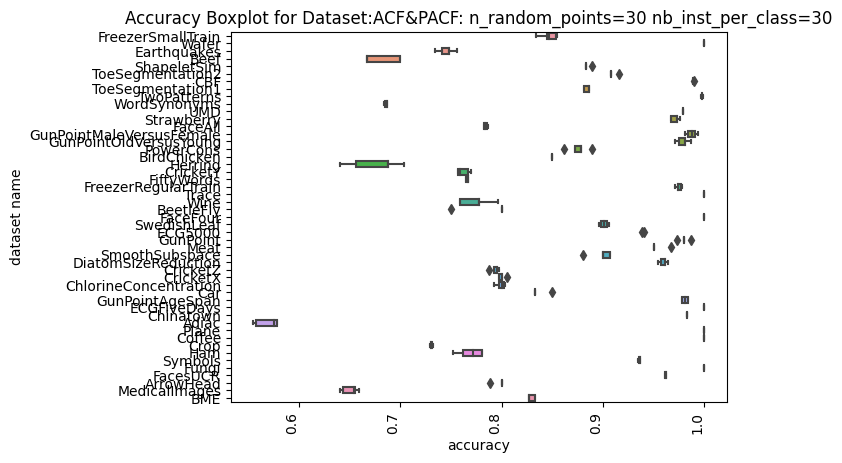

In [28]:
max_bx=max(df_result.accuracy)
min_bx=min(df_result.accuracy)


#df_to_cd=pd.pivot_table(df_to_cd, index=['dataset_name','classifier_name'], columns=['rpoint'],values='accuracy')
#df_to_cd = df_to_cd.reindex(columns=["1","10","30","50","100","half_len"])

#print(df_to_cd.head(5))

# Plot
fig, ax = plt.subplots()


#order=list(df_to_cd)
sns.boxplot(data=df_result, y='dataset_name', x='accuracy')
#plt.boxplot(df_to_cd, labels=list(df_to_cd), showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Axis details

ax.set(ylabel='dataset name', xlabel='accuracy', title='Accuracy Boxplot for Dataset:'+str(df_result["classifier_name"].unique()[0]))

#plt.xticks([1, 2, 3, 4, 5, 6],list(df_to_cd) )
#print(df_to_cd.describe())
#plt.tight_layout()
# save plot
plt.savefig('images_boxplot_acc/boxplot_acc_per_ds.png')

In [29]:
filter_param=concatenated_df[concatenated_df.classifier_name==hyperparameter]

In [30]:
stats = filter_param.groupby(['dataset_name'])['accuracy'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []
ci95_hi_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
    ci95_hi_lo.append(1.96*s/math.sqrt(c))

#stats['ci95_hi'] = ci95_hi
#stats['ci95_lo'] = ci95_lo
stats['ci95_interval'] = ci95_hi_lo
print(stats.round(2))

                          mean  count   std  ci95_interval
dataset_name                                              
Adiac                     0.57      5  0.01           0.01
ArrowHead                 0.80      5  0.01           0.00
BME                       0.83      5  0.00           0.00
Beef                      0.68      5  0.02           0.02
BeetleFly                 0.79      5  0.02           0.02
BirdChicken               0.85      5  0.00           0.00
CBF                       0.99      5  0.00           0.00
Car                       0.84      5  0.01           0.01
Chinatown                 0.98      5  0.00           0.00
ChlorineConcentration     0.80      5  0.00           0.00
Coffee                    1.00      5  0.00           0.00
CricketX                  0.80      5  0.00           0.00
CricketY                  0.76      5  0.01           0.01
CricketZ                  0.79      5  0.00           0.00
Crop                      0.73      5  0.00           0.

In [31]:
# create a pivot table with the mean of score by hyperparameter
score_by_method=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'],columns=['dataset_name'], aggfunc='std')
#t_score_by_method=score_by_method.transpose()[[hyperparameter,"SAST"]].round(2)
t_score_by_method=score_by_method.transpose().round(2)
t_score_by_method.iloc[0:25,:]


classifier_name,ACF&PACF: n_random_points=30 nb_inst_per_class=30
dataset_name,
Adiac,0.01
ArrowHead,0.01
BME,0.00
Beef,0.02
BeetleFly,0.02
BirdChicken,0.00
CBF,0.00
Car,0.01
Chinatown,0.00


In [32]:
t_score_by_method.iloc[25:49,:]

classifier_name,ACF&PACF: n_random_points=30 nb_inst_per_class=30
dataset_name,
Fungi,0.00
GunPoint,0.00
GunPointAgeSpan,0.00
GunPointMaleVersusFemale,0.01
GunPointOldVersusYoung,0.01
Ham,0.01
Herring,0.03
Meat,0.01
MedicalImages,0.01


In [33]:
t_score_by_method.iloc[49:75,:]

classifier_name,ACF&PACF: n_random_points=30 nb_inst_per_class=30
dataset_name,


In [34]:
t_score_by_method.describe().round(2)

classifier_name,ACF&PACF: n_random_points=30 nb_inst_per_class=30
count,49.00
mean,0.00
std,0.01
min,0.00
25%,0.00
50%,0.00
75%,0.01
max,0.03


In [35]:
score_by_method=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'],columns=['dataset_name'], aggfunc='mean')
t_score_by_method=score_by_method.transpose()[[hyperparameter,"SAST"]].round(2)
total_wins=len(t_score_by_method[0<(t_score_by_method[hyperparameter].round(2)-t_score_by_method["SAST"].round(2))])
print("winning RSAST: "+str(total_wins))

winning RSAST: 21


In [36]:
total_loss=len(t_score_by_method[0>(t_score_by_method[hyperparameter].round(2)-t_score_by_method["SAST"].round(2))])
print("losse RSAST: "+str(total_loss))

losse RSAST: 14


In [37]:
total_draws=len(t_score_by_method[0==(t_score_by_method[hyperparameter].round(2)-t_score_by_method["SAST"].round(2))])
print("draws: "+str(total_draws))

draws: 14


In [38]:
#wins of RSAST
t_score_by_method[0<(t_score_by_method[hyperparameter].round(2)-t_score_by_method["SAST"].round(2))].index

Index(['ArrowHead', 'BirdChicken', 'CBF', 'Chinatown', 'ChlorineConcentration',
       'CricketX', 'CricketY', 'CricketZ', 'Earthquakes', 'FacesUCR',
       'FreezerSmallTrain', 'Fungi', 'GunPoint', 'GunPointAgeSpan',
       'GunPointOldVersusYoung', 'Ham', 'Herring', 'Meat', 'SwedishLeaf',
       'ToeSegmentation2', 'TwoPatterns'],
      dtype='object', name='dataset_name')

In [39]:
pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'], aggfunc='var').round(4)

,accuracy
classifier_name,
ACF&PACF: n_random_points=30 nb_inst_per_class=30,0.0132
HIVE-COTEv1,0.0116
ROCKET,0.0091
SAST,0.0132
STC,0.0467


/tmp/ipykernel_117732/3124073668.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


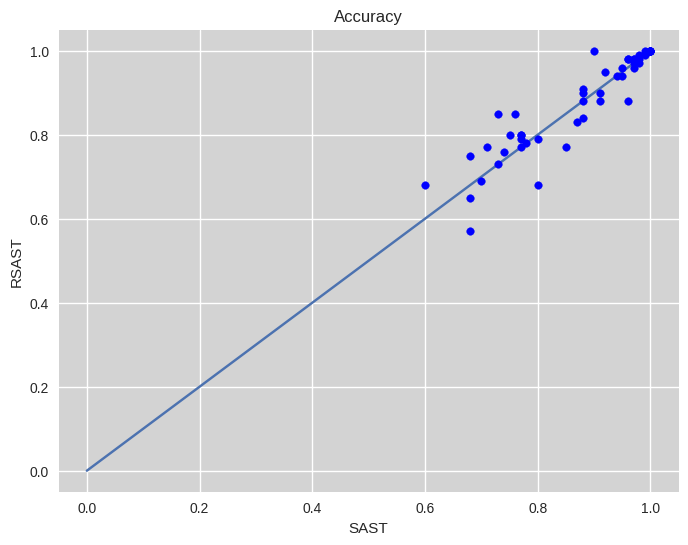

In [40]:
for method in t_score_by_method.columns.drop(hyperparameter):
    y=t_score_by_method[hyperparameter]
    x=t_score_by_method[method]

    # set the style of the plot
    plt.style.use('seaborn')

    # create the plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # plot the line
    ax.plot([0,1], [0,1])

    # plot the points
    ax.scatter(x, y, color='blue', edgecolor='blue', s=30, zorder=10)

    # add labels and title
    ax.set_ylabel('RSAST')
    ax.set_xlabel(method)
    ax.set_title('Accuracy')


    # set the background color
    ax.set_facecolor('lightgrey')
    plt.savefig('images_one_vs_one_comparison/RSASTvs'+method+'.png')


In [41]:
# create a pivot table with the mean of time by hyperparameter
time_per_method=pd.pivot_table(df_result, values='time', columns=['classifier_name'],index=['dataset_name'], aggfunc='mean')/60
time_per_method

classifier_name,ACF&PACF: n_random_points=30 nb_inst_per_class=30
dataset_name,
Adiac,0.765250
ArrowHead,0.106687
BME,0.015963
Beef,0.499705
BeetleFly,0.488962
BirdChicken,0.455494
CBF,0.016679
Car,2.501789
Chinatown,0.000851


In [42]:
# create a pivot table with the variation of score by hyperparameter
pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'],columns=['dataset_name'], aggfunc='var')


dataset_name,Adiac,ArrowHead,BME,Beef,BeetleFly,BirdChicken,CBF,Car,Chinatown,ChlorineConcentration,...,SwedishLeaf,Symbols,ToeSegmentation1,ToeSegmentation2,Trace,TwoPatterns,UMD,Wafer,Wine,WordSynonyms
classifier_name,,,,,,,,,,,,,,,,,,,,,
ACF&PACF: n_random_points=30 nb_inst_per_class=30,0.000133,0.000026,0.000013,0.000333,0.0005,0.0,2.469136e-07,0.000056,0.0,0.000019,...,0.000017,8.080604e-07,0.000006,0.000012,0.0,2.312500e-07,0.0,0.0,0.00024,0.000002


#### Generate CD Diagram comparison

In [43]:
concatenated_df=concatenated_df[concatenated_df.dataset_name!="Fungi"]
df_perf=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
pd.pivot_table(df_perf, values='accuracy', index=['classifier_name'], aggfunc='count')

,accuracy
classifier_name,
ACF&PACF: n_random_points=30 nb_inst_per_class=30,48
HIVE-COTEv1,48
ROCKET,48
SAST,48
STC,48


In [44]:
concatenated_df.classifier_name.unique()

array(['ROCKET', 'HIVE-COTEv1', 'SAST', 'STC',
       'ACF&PACF: n_random_points=30 nb_inst_per_class=30'], dtype=object)

In [45]:

from cd_function import *
df_perf=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
draw_cd_diagram(df_perf, labels=True, title="Overall Comparison Other Methods", fname='images_cd_diagram/cd-diagram_overall_comparison_other_method.png')


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

{0: 'STC', 1: 'SAST', 2: 'ACF&PACF: n_random_points=30 nb_inst_per_class=30', 3: 'HIVE-COTEv1', 4: 'ROCKET'}
[1, 2]
[3, 4]


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

In [46]:
df_perf["classifier_name"].unique()

array(['ACF&PACF: n_random_points=30 nb_inst_per_class=30', 'HIVE-COTEv1',
       'ROCKET', 'SAST', 'STC'], dtype=object)

In [47]:
_, average_ranks, _ = wilcoxon_holm(df_perf=df_perf)
min_rank= min(average_ranks)
average_ranks=pd.DataFrame(average_ranks)
average_ranks

/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


,0
STC,4.072917
SAST,3.531250
ACF&PACF: n_random_points=30 nb_inst_per_class=30,3.291667
HIVE-COTEv1,2.260417
ROCKET,1.843750
